# Análisis de Datos con el Dataset "Adult Income"

El Dataset "Adult Income" es una colección de datos demográficos y laborales extraídos del censo estadounidense de 1994, recopilado por la Oficina del Censo de los Estados Unidos. Este conjunto de datos es ampliamente utilizado en tareas de aprendizaje automático, estadística y análisis de datos para estudios relacionados con clasificación, regresión y pruebas de hipótesis estadísticas.

El objetivo principal asociado con este dataset es predecir si un individuo gana más de $50,000 al año en función de sus atributos personales y laborales. Este análisis permite explorar relaciones entre variables y realizar interpretaciones significativas a nivel social y económico.

## Descripción de las Variables

El dataset incluye las siguientes variables:

- **age**: Edad del individuo (en años).
- **workclass**: Tipo de empleo (p. ej., privado, gubernamental, autónomo, etc.).
- **fnlwgt**: Peso final asignado a la observación, utilizado para expandir la muestra del censo.
- **education**: Nivel educativo alcanzado (p. ej., secundaria, licenciatura, maestría).
- **education.num**: Nivel educativo en formato numérico (años de educación).
- **marital.status**: Estado civil (p. ej., casado, soltero, divorciado).
- **occupation**: Ocupación laboral (p. ej., administrativo, técnico, etc.).
- **relationship**: Relación familiar con el cabeza de familia (p. ej., esposo/a, hijo/a, etc.).
- **race**: Raza del individuo (p. ej., blanca, negra, asiática).
- **sex**: Género del individuo (masculino o femenino).
- **capital.gain**: Ganancia de capital obtenida.
- **capital.loss**: Pérdida de capital reportada.
- **native.country**: País de origen.
- **hours.per.week**: Número de horas trabajadas por semana.
- **income**: Variable objetivo, indica si el ingreso anual es '>50K' o '<=50K'.



## 1. Análisis de datos: 
Realiza un análisis general de los datos. Presta atención al tamaño de los datos y la cantidad de datos nulos que tiene el set de datos. Analiza y clasifica las variables del dataset.
- Indica el tamaño del dataset (número de filas y columnas).
- Comenta brevemente si la calidad de los datos es adecuada para el análisis posterior o si sería necesario algún tratamiento previo.

Selecciona las variables más apropiadas para realizar los siguientes cálculos para que aporten información relevante sobre los datos:
- Calcular medidas de tendencia central (media, mediana, moda) y dispersión (desviación estándar, varianza).
- Visualizar los datos mediante histogramas, diagramas de barras, diagramas de caja y gráficos de sectores.
- Detectar valores atípicos en las variables numéricas.
- Explorar relaciones entre variables numéricas y categóricas.
- Evaluar las distribuciones de las variables clave.

In [24]:
# Importando librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np

# Cargar el conjunto de datos "adult.csv" y vemos el tamaño del dataframe
df_adulto = pd.read_csv('adult.csv', sep=",")

# Limpiar dataframe
df_adulto.replace("?", np.nan, inplace=True)
resumen = pd.DataFrame({"nulos" : df_adulto.isnull().sum, "%_nulos": (df_adulto.isnull().mean * 100).round(2)})

resumen[resumen["nulos" > 0].sort_values("nulos", ascending=False)]

df_adulto.describe()
# Viendo el describe, podemos ver que la calidad de los datos es correcta, pero que la mayoria de las personas son de menor edad
# Esto se ve en el tercer cuartil que la edad es 48 y el máximo es de 90 años

TypeError: unsupported operand type(s) for *: 'method' and 'int'

In [12]:
# Ahora vamos a calcular las variables (media, mediana, moda, varianza y desviación estándar) de la columna "edad"
media_edad = df_adulto['age'].mean()
mediana_edad = df_adulto['age'].median()
moda_edad = stats.multimode(df_adulto['age'])
varianza_edad = df_adulto['age'].var()
desviacion_estandar_edad = df_adulto['age'].std()

print("La media de edad es:", media_edad)
print("La mediana de edad es:", mediana_edad)
print("La moda de edad es:", moda_edad)
print("La varianza de edad es:", varianza_edad)
print("La desviación estándar de edad es:", desviacion_estandar_edad)

# Ahora vamos a ver los outliers, para eso voy a trabajar con el primer y tercer cuartil
q1= np.percentile(df_adulto["age"], 25)
q2= np.percentile(df_adulto["age"], 50)
q3= np.percentile(df_adulto["age"], 75)

print("El primer cuartil es: ", q1)
print("El segundo cuartil es: ", q2)
print("El tercer cuartil es: ", q3)

# Calcula rangos intercuartilicos
iqr = q3 - q1
print("El rango intercuartílico es: ", iqr)

# Detecta outliers
outlier_menor = q1 - 1.5*iqr
outlier_mayor = q3 + 1.5*iqr

lista_outliers = []
for num in df_adulto['age']:
    if num < outlier_menor:
        lista_outliers.append(num)
    if num > outlier_mayor:
        lista_outliers.append(num)
    else:
        None

lista_outliers.sort()
print("Los outliers son: ", lista_outliers)
# Podemos ver que hay varios outliers, pero no son muchos en comparación con el total de datos (32561)

# Ver las correlaciones entre las variables del dataframe
df_adulto.corr(numeric_only=True)
# La mayor relacion es entre el nivel educativo y las horas trabajadas por semana. Aunque el valor es 0.14 con lo cual no es muy alto

La media de edad es: 38.58164675532078
La mediana de edad es: 37.0
La moda de edad es: [36]
La varianza de edad es: 186.0614002487955
La desviación estándar de edad es: 13.640432553581118
El primer cuartil es:  28.0
El segundo cuartil es:  37.0
El tercer cuartil es:  48.0
El rango intercuartílico es:  20.0
Los outliers son:  [79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 83, 83, 83, 83, 83, 83, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 85, 85, 85, 86, 87, 88, 88, 88, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90]


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


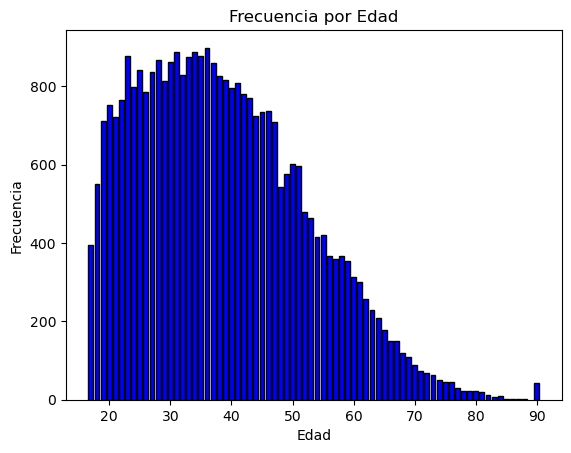

In [13]:
# Diagrama de barras de la frecuencia de la edad
frecuencia_edad = df_adulto['age'].value_counts().sort_index()

plt.bar(frecuencia_edad.index, frecuencia_edad.values, color='blue', edgecolor='black')
plt.title('Frecuencia por Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


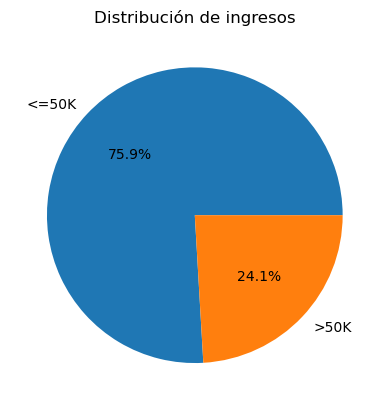

In [14]:
df_adulto["income"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Distribución de ingresos")
plt.ylabel("")
plt.show()

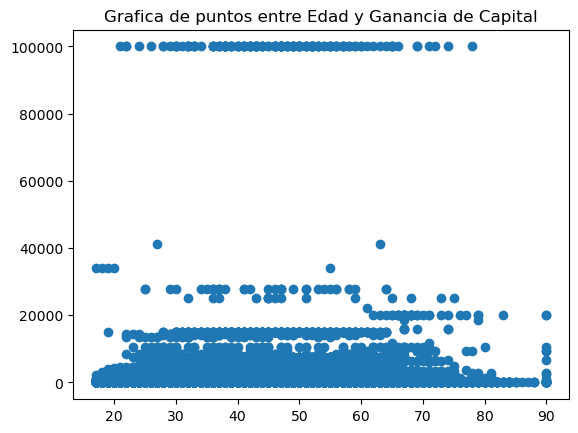

In [15]:
## Grafica de puntos capital.gain
plt.scatter(df_adulto["age"], df_adulto["capital.gain"])
plt.title("Grafica de puntos entre Edad y Ganancia de Capital")
plt.show()

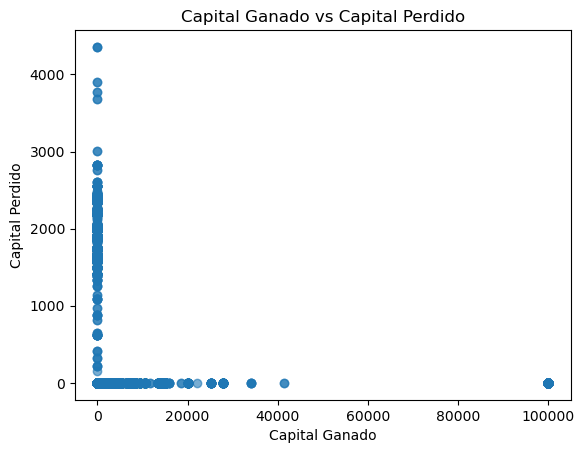

In [16]:
import matplotlib.pyplot as plt

plt.scatter(df_adulto["capital.gain"], df_adulto["capital.loss"], alpha=0.6)
plt.xlabel("Capital Ganado")
plt.ylabel("Capital Perdido")
plt.title("Capital Ganado vs Capital Perdido")
plt.show()


## 2. Clasificación y selección de variables

- Clasifica las variables del dataset en numéricas y categóricas, indicando cuáles son continuas y cuáles discretas.
Selecciona de forma justificada al menos:
- Tres variables numéricas relevantes.
- Dos variables categóricas significativas.
- Explica por qué estas variables resultan adecuadas para el análisis planteado.

In [17]:
# Las variables numéricas son: age, fnlwgt, education.num, capital-gain, capital-loss, hours.per.week
# Las variables categóricas son: workclass, education, marital-status, occupation, relationship, race, sex, native-country, income

# Las 3 variables numéricas más importantes son: age, hours.per.week y education.num
# Las 2 variables categóricas más importantes son: education y occupation

# Estas son las variables más adecuadas ya que son las que más información aportan sobre el conjunto de datos y son las que más 
# pueden influir en el análisis de los datos.

## 3. Análisis estadístico descriptivo
Calcula, para las variables numéricas seleccionadas:
- Medidas de tendencia central (media, mediana y moda).
- Medidas de dispersión (varianza y desviación estándar).
- Interpreta los resultados obtenidos, comentando qué indican sobre la distribución y variabilidad de los datos.

In [18]:
# Medidas de tendencia central y de dispersión para la edad (age)
media_edad = df_adulto['age'].mean()
mediana_edad = df_adulto['age'].median()
moda_edad = stats.multimode(df_adulto['age'])
varianza_edad = df_adulto['age'].var()
desviacion_estandar_edad = df_adulto['age'].std()

print("La media de edad es:", media_edad)
print("La mediana de edad es:", mediana_edad)
print("La moda de edad es:", moda_edad)
print("La varianza de edad es:", varianza_edad)
print("La desviación estándar de edad es:", desviacion_estandar_edad)

# Los resultados obtenidos indican que la mayoria de estas personas se encuentran en un rango de edad de 30 a 50 años, 
# con una media de 38.5 años.
# La distribucion al ser tan baja indica que los valores estan muy cercanos a la media, por lo que no hay mucha variabilidad 
# en las edades de las personas en el conjunto de datos.

La media de edad es: 38.58164675532078
La mediana de edad es: 37.0
La moda de edad es: [36]
La varianza de edad es: 186.0614002487955
La desviación estándar de edad es: 13.640432553581118


In [19]:
# Medidas de tendencia central y de dispersión para las horas trabajadas por semana (hours.per.week)
media_horas_trabajadas = df_adulto['hours.per.week'].mean()
mediana_horas_trabajadas = df_adulto['hours.per.week'].median()
moda_horas_trabajadas = stats.multimode(df_adulto['hours.per.week'])
varianza_horas_trabajadas = df_adulto['hours.per.week'].var()
desviacion_estandar_horas_trabajadas = df_adulto['hours.per.week'].std()

print("La media de horas trabajadas por semana es:", media_horas_trabajadas)
print("La mediana de horas trabajadas por semana es:", mediana_horas_trabajadas)
print("La moda de horas trabajadas por semana es:", moda_horas_trabajadas)
print("La varianza de horas trabajadas por semana es:", varianza_horas_trabajadas)
print("La desviación estándar de horas trabajadas por semana es:", desviacion_estandar_horas_trabajadas)

# Los resultados obtenidos indican que la mayoria de estas personas trabajan alrededor de 40 horas por semana, 
# con una media de 40.4 horas.
# La desviacion estandar es baja, lo que indica que la mayoria de las personas trabajan un numero similar de horas por semana, 
# con poca variabilidad en los datos.

La media de horas trabajadas por semana es: 40.437455852092995
La mediana de horas trabajadas por semana es: 40.0
La moda de horas trabajadas por semana es: [40]
La varianza de horas trabajadas por semana es: 152.4589950504292
La desviación estándar de horas trabajadas por semana es: 12.347428681730833


In [20]:
# Medidas de tendencia central y de dispersión para los años de educacion (education.num)
media_educacion = df_adulto['education.num'].mean()
mediana_educacion = df_adulto['education.num'].median()
moda_educacion = stats.multimode(df_adulto['education.num'])
varianza_educacion = df_adulto['education.num'].var()
desviacion_estandar_educacion = df_adulto['education.num'].std()

print("La media de años de educación es:", media_educacion)
print("La mediana de años de educación es:", mediana_educacion)
print("La moda de años de educación es:", moda_educacion)
print("La varianza de años de educación es:", varianza_educacion)
print("La desviación estándar de años de educación es:", desviacion_estandar_educacion)

# Los resultados obtenidos indican que la mayoria de estas personas tienen alrededor de 10 a 13 años de educación, 
# con una media de 10.1 años.
# La desviacion estandar es moderada, lo que indica que hay una variabilidad moderada en los años de educación de las personas 
# en el conjunto de datos.

La media de años de educación es: 10.0806793403151
La mediana de años de educación es: 10.0
La moda de años de educación es: [9]
La varianza de años de educación es: 6.618889907032666
La desviación estándar de años de educación es: 2.5727203320673366


## 4. Consultas a los datos

- ¿Cuál es la media de la edad por nivel educativo?
- ¿Cuántos individuos trabajan más de 40 horas por semana y cuál es su distribución por ocupación?
- ¿Cuál es el promedio de ganancia de capital entre los individuos que tienen un ingreso mayor a $50,000?

In [21]:
media_edad_nivel_educativo = df_adulto["age"].groupby(df_adulto["education"]).mean()
print(media_edad_nivel_educativo)

df_40_horas = df_adulto.loc[df_adulto["hours.per.week"] >= 40]
individuos_40_horas = df_40_horas["occupation"].count()
print("La distribucion de la gente que trabaja mas de 40 horas semana es de:" ,individuos_40_horas)

df_mayor_50k = df_adulto.loc[df_adulto["income"] == ">50K"]
promedio_ganancia = df_mayor_50k["capital.gain"].mean()
print("El promedio de ganancia de gente que gana mas de 50k es de: ", promedio_ganancia)

education
10th            37.429796
11th            32.355745
12th            32.000000
1st-4th         46.142857
5th-6th         42.885886
7th-8th         48.445820
9th             41.060311
Assoc-acdm      37.381443
Assoc-voc       38.553546
Bachelors       38.904949
Doctorate       47.702179
HS-grad         38.974479
Masters         44.049913
Preschool       42.764706
Prof-school     44.746528
Some-college    35.756275
Name: age, dtype: float64
La distribucion de la gente que trabaja mas de 40 horas semana es de: 23899
El promedio de ganancia de gente que gana mas de 50k es de:  4006.142456319347




# 5. Conclusiones

En este punto, redacta 5–10 líneas justificando los siguientes puntos:
- Variables que han resultado más informativas y por qué.
- Principales patrones observados (distribuciones, diferencias entre grupos).
- Presencia de outliers y decisiones (mantener/transformar).
- Qué pasos serían lógicos a continuación (p.ej., preparación para modelado).


El análisis de los datos muestra que variables como education-num, age, hours-per-week y capital.gain aportan información relevante sobre el nivel de ingresos. Se observan diferencias claras entre personas con ingresos altos y bajos, especialmente en el nivel educativo y las horas trabajadas. La variable capital.gain presenta muchos valores cero y algunos valores muy altos, que no se consideran errores. Para mejorar su interpretación, se aplica una transformación y se crea una variable que indica si existe ganancia de capital. Como siguientes pasos, se prepararán los datos para su uso en modelos predictivos.

